# **Retail Sales Analysis (Python)**

**Objective**:
Analyze sales and profit trends, discount impact, and identify loss-making patterns
to support business decision-making.

**Tools:**
Python, pandas, matplotlib


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving superstore_for_python.csv to superstore_for_python.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("superstore_for_python.csv")

In [ ]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,profit_margin
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.9136,0.1600
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.5820,0.3000
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.8714,0.4700
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.0310,-0.4000
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.5164,0.1125


In [ ]:
df.shape

(9994, 22)

In [ ]:
df.describe()

,row_id,postal_code,sales,quantity,discount,profit,profit_margin
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858022,3.789574,0.156203,28.656896,0.120314
std,2885.163629,32063.693350,623.245131,2.225110,0.206452,234.260108,0.466754
min,1.000000,1040.000000,0.440000,1.000000,0.000000,-6599.978000,-2.750000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,0.075000
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500,0.270000
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000,0.362500
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,0.500000


In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9994 non-null   int64         
 1   order_id       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   datetime64[ns]
 4   ship_mode      9994 non-null   object        
 5   customer_id    9994 non-null   object        
 6   customer_name  9994 non-null   object        
 7   segment        9994 non-null   object        
 8   country        9994 non-null   object        
 9   city           9994 non-null   object        
 10  states         9994 non-null   object        
 11  postal_code    9994 non-null   int64         
 12  region         9994 non-null   object        
 13  product_id     9994 non-null   object        
 14  category       9994 non-null   object        
 15  sub_category   9994 n

In [ ]:
monthly = (
    df
    .groupby(df['order_date'].dt.to_period('M'))
    .agg(
        total_sales=('sales', 'sum'),
        total_profit=('profit', 'sum')
    )
    .reset_index()
)

monthly['order_date'] = monthly['order_date'].astype(str)
monthly.head(10)

,order_date,total_sales,total_profit
0,2014-01,14236.90,2450.1907
1,2014-02,4519.92,862.3084
2,2014-03,55691.04,498.7299
3,2014-04,28295.35,3488.8352
4,2014-05,23648.28,2738.7096
5,2014-06,34595.14,4976.5244
6,2014-07,33946.37,-841.4826
7,2014-08,27909.47,5318.1050
8,2014-09,81777.34,8328.0994
9,2014-10,31453.37,3448.2573


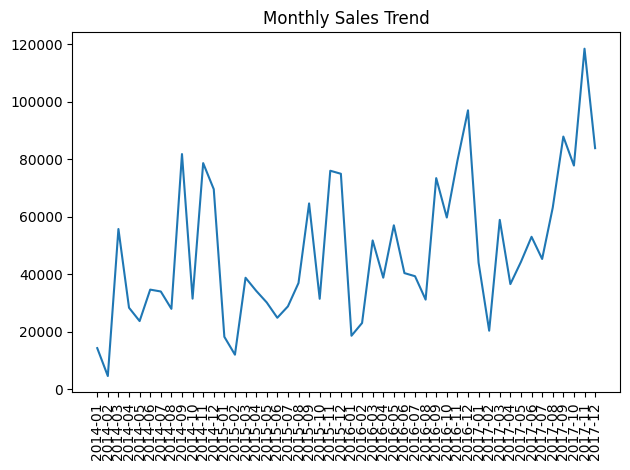

In [ ]:
plt.figure()
plt.plot(monthly['order_date'], monthly['total_sales'])
plt.xticks(rotation=90)
plt.title("Monthly Sales Trend")
plt.tight_layout()
plt.show()

In [ ]:
discount_analysis = (
    df
    .groupby('discount')
    .agg(
        avg_profit=('profit', 'mean'),
        order_count=('order_id', 'count')
    )
    .reset_index()
)

discount_analysis.head()

,discount,avg_profit,order_count
0,0.00,66.900292,4798
1,0.10,96.055074,94
2,0.15,27.288298,52
3,0.20,24.702572,3657
4,0.30,-45.679636,227


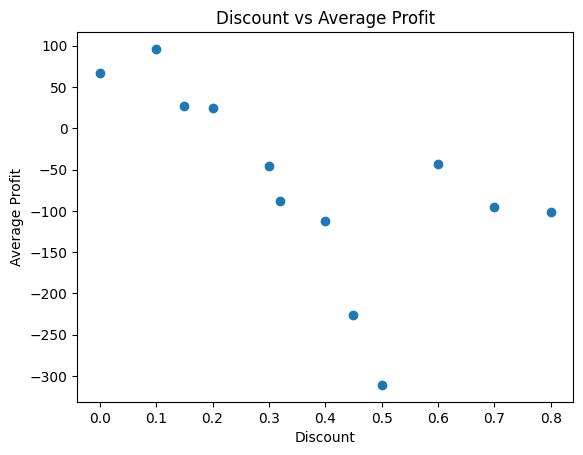

In [ ]:
plt.figure()
plt.scatter(discount_analysis['discount'], discount_analysis['avg_profit'])
plt.xlabel("Discount")
plt.ylabel("Average Profit")
plt.title("Discount vs Average Profit")
plt.show()

In [ ]:
loss_orders = df[df['profit'] < -1000]
loss_orders[['product_name', 'sales', 'profit']].head()

,product_name,sales,profit
27,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.43,-1665.0522
166,Lexmark MX611dhe Monochrome Laser Printer,8159.95,-1359.9920
683,Cubify CubeX 3D Printer Triple Head Print,7999.98,-3839.9904
1199,GBC DocuBind P400 Electric Binding System,1088.79,-1850.9464
1803,Martin Yale Chadless Opener Electric Letter Op...,4663.74,-1049.3406


## Key Insights from Python Analysis

- **Discounts above 20% lead to significant profit erosion**, with discounts of 30% resulting in negative average profit of USD -48.87 per order, demonstrating a clear threshold where promotions become unprofitable.

- **A small subset of products contributes disproportionately to losses**, with just two products (a lawyer's bookcase and monochrome laser printer) accounting for losses exceeding USD 2,400, indicating potential issues with specific product pricing or cost structures.

- **Sales show significant monthly volatility**, with September 2014 peaking at USD 81,777 in sales compared to February's low of USD 4,520, suggesting strong seasonal patterns or promotional impacts that require further investigation.

- **Profitability doesn't always correlate with sales volume**, as evidenced by March 2014 generating USD 55,991 in sales but only USD 489 in profit (0.9% margin), while August produced less sales (USD 27,090) but higher profit (USD 5,318 at 19.6% margin).

- **The relationship between discount and profit follows a clear negative trend**, with average profit decreasing as discount percentage increases, highlighting the need for more strategic, targeted discounting rather than blanket promotional strategies.

**Note:** The analysis reveals critical thresholds where business decisions (particularly around discounting) directly impact profitability, with clear evidence that higher discounts don't necessarily drive proportional sales increases to offset profit erosion.